### Set up

In [3]:
import pandas as pd
import numpy as np
import altair as alt
import glob
import os
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
from scipy.signal import butter, filtfilt

alt.data_transformers.disable_max_rows()
fs = 22050

TypeError: _TypedDictMeta.__new__() got an unexpected keyword argument 'closed'

### Load data

In [23]:
# Which fish?
subjid = 'hydrolagusColliei_8'

loaded = np.load(f'{subjid}_data.npz', allow_pickle=True)
data = loaded['data']
freq_amp_table = loaded['freq_amp_table']
latency = loaded['latency'].item()
channel_keys = loaded['channel_keys'].tolist()

data

array({(np.float64(55.0), np.float64(115.0)): {'filename': 'data\\hydrolagusColliei_8_AdaptiveAEP_Ratfish_2506211524_1_run.mat', 'decision': array([[1.]]), 'period_len': 3528, 'ch1': array([[ 1.13919523,  0.29854812,  0.51171346, ...,  0.24535885,
         0.71333113,  0.17893058],
       [-0.53218433, -0.06263737,  0.94265154, ..., -0.704058  ,
         1.99663896,  3.66895166],
       [ 2.37567084,  1.16514833,  0.0586715 , ..., -1.92881097,
        -1.78592312, -0.78063422],
       ...,
       [ 0.52711035, -1.10291921, -1.87754631, ..., -0.50617291,
        -0.01370557, -0.80273809],
       [ 0.82851623,  0.15274419,  0.2325281 , ...,  1.65131694,
         1.86232438,  0.56490273],
       [ 2.03851384,  2.79068714,  2.93614113, ..., -1.96881957,
        -0.88677948, -1.29520543]], shape=(100, 10584)), 'ch2': array([[ 1.83689618,  1.50323847,  1.31520973, ..., -0.0951808 ,
        -0.09308123, -0.0600129 ],
       [-0.06205415,  0.44131932,  0.61360124, ...,  1.10729333,
         1.

In [48]:
data.item()[100,115]

{'filename': 'data\\hydrolagusColliei_8_AdaptiveAEP_Ratfish_2506211524_1_run.mat',
 'decision': array([[1.]]),
 'period_len': 3528,
 'ch1': array([[ 0.23013692, -0.48733504, -0.26425503, ..., -0.41326665,
         -1.00861324,  0.38958809],
        [ 0.55119716,  0.25609001, -1.12729763, ...,  1.33223963,
          1.1077599 ,  1.18089515],
        [-0.07535147,  0.8187182 ,  1.85217643, ..., -0.31861074,
         -0.50827248,  0.68726138],
        ...,
        [ 0.92643814, -0.15770153,  0.01143103, ...,  1.28814852,
          0.65827556, -1.04471429],
        [ 1.53269087,  1.38997798,  1.94624912, ...,  1.19010996,
          1.02331027,  0.22232183],
        [ 1.45973058, -0.39162934,  0.05342256, ...,  0.85551911,
          0.50139054,  0.88940395]], shape=(100, 10584)),
 'ch2': array([[-1.38093814, -1.20655664, -1.14117816, ...,  0.03172693,
          0.08777396,  0.18108848],
        [ 0.76803676,  0.62427409,  0.33972315, ..., -0.10579533,
          0.16009271,  0.4655811 ],
   

### What stimulus frequencies and amplitudes were tested for this fish?

In [24]:
freq_amp_table_df = pd.DataFrame(freq_amp_table).sort_values(by= [0,1],ascending=True)
print(list(data.item().keys()))
freq_amp_table_df

[(np.float64(55.0), np.float64(115.0)), (np.float64(55.0), np.float64(110.0)), (np.float64(55.0), np.float64(105.0)), (np.float64(55.0), np.float64(100.0)), (np.float64(55.0), np.float64(95.0)), (np.float64(220.0), np.float64(125.0)), (np.float64(220.0), np.float64(120.0)), (np.float64(220.0), np.float64(115.0)), (np.float64(220.0), np.float64(110.0)), (np.float64(220.0), np.float64(105.0)), (np.float64(220.0), np.float64(100.0)), (np.float64(220.0), np.float64(95.0)), (np.float64(220.0), np.float64(90.0)), (np.float64(880.0), np.float64(150.0)), (np.float64(880.0), np.float64(140.0)), (np.float64(100.0), np.float64(115.0)), (np.float64(100.0), np.float64(110.0)), (np.float64(100.0), np.float64(105.0)), (np.float64(100.0), np.float64(100.0)), (np.float64(440.0), np.float64(150.0)), (np.float64(1695.0), np.float64(150.0)), (np.float64(330.0), np.float64(150.0)), (np.float64(360.0), np.float64(150.0)), (np.float64(385.0), np.float64(150.0)), (np.float64(55.0), np.float64(90.0)), (np.floa

,0,1
30,55.0,90.0
4,55.0,95.0
29,55.0,95.0
3,55.0,100.0
28,55.0,100.0
2,55.0,105.0
27,55.0,105.0
1,55.0,110.0
26,55.0,110.0
0,55.0,115.0


### Get data for responses to single stimulus type (frequency,amplitude)

In [25]:
# Select which stimulus frequency and amplitude to analyze
myfreq = 100
myamp = 115

specific_key = (np.float64(myfreq), np.float64(myamp))
current_cond = data.item()[specific_key]
current_cond

{'filename': 'data\\hydrolagusColliei_8_AdaptiveAEP_Ratfish_2506211524_1_run.mat',
 'decision': array([[1.]]),
 'period_len': 3528,
 'ch1': array([[ 0.23013692, -0.48733504, -0.26425503, ..., -0.41326665,
         -1.00861324,  0.38958809],
        [ 0.55119716,  0.25609001, -1.12729763, ...,  1.33223963,
          1.1077599 ,  1.18089515],
        [-0.07535147,  0.8187182 ,  1.85217643, ..., -0.31861074,
         -0.50827248,  0.68726138],
        ...,
        [ 0.92643814, -0.15770153,  0.01143103, ...,  1.28814852,
          0.65827556, -1.04471429],
        [ 1.53269087,  1.38997798,  1.94624912, ...,  1.19010996,
          1.02331027,  0.22232183],
        [ 1.45973058, -0.39162934,  0.05342256, ...,  0.85551911,
          0.50139054,  0.88940395]], shape=(100, 10584)),
 'ch2': array([[-1.38093814, -1.20655664, -1.14117816, ...,  0.03172693,
          0.08777396,  0.18108848],
        [ 0.76803676,  0.62427409,  0.33972315, ..., -0.10579533,
          0.16009271,  0.4655811 ],
   

### Wavelet or other signal processing technique here

In [26]:
# 

### Reshape data for PCA/ICA

In [27]:
# (trials x samples) x 4 channels

# Get data from channel 1
X_all_periods = current_cond['ch1'].reshape(1, -1).T
selected_keys = channel_keys[1:5]

# Then get the rest of the channels
for channel in selected_keys:
    tmp = current_cond[channel].reshape(1, -1).T
    X_all_periods = np.hstack([X_all_periods, tmp])

X_all_periods

array([[ 0.23013692, -1.38093814, -0.24675856,  0.69146054],
       [-0.48733504, -1.20655664,  0.85569408,  2.42063677],
       [-0.26425503, -1.14117816,  0.09418934,  0.97280379],
       ...,
       [ 0.85551911,  1.1856192 ,  1.264295  ,  0.14697036],
       [ 0.50139054,  1.24988957, -0.27247838, -0.542099  ],
       [ 0.88940395,  1.44596669, -0.22179693, -0.03009393]],
      shape=(1058400, 4))

### PCA

In [28]:
pca = PCA(n_components=len(channel_keys))
X_pca = pca.fit_transform(X_all_periods)

print('All periods')
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Component loadings shape:", pca.components_.shape)

All periods
Explained variance ratio: [0.53360192 0.19208045 0.15978711 0.11453052]
Component loadings shape: (4, 4)


### Scree plot

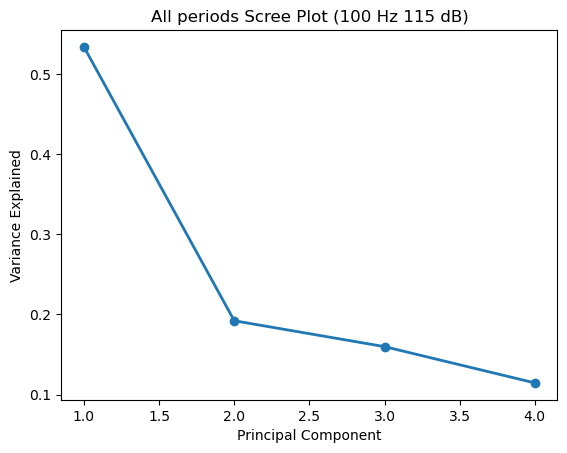

In [29]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2)
plt.title(f'All periods Scree Plot ({myfreq} Hz {myamp} dB)')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.savefig(f'{subjid}_{myfreq}Hz_{myamp}dB_chart11.png', dpi=300, bbox_inches='tight')
plt.show()

### Loading Plot

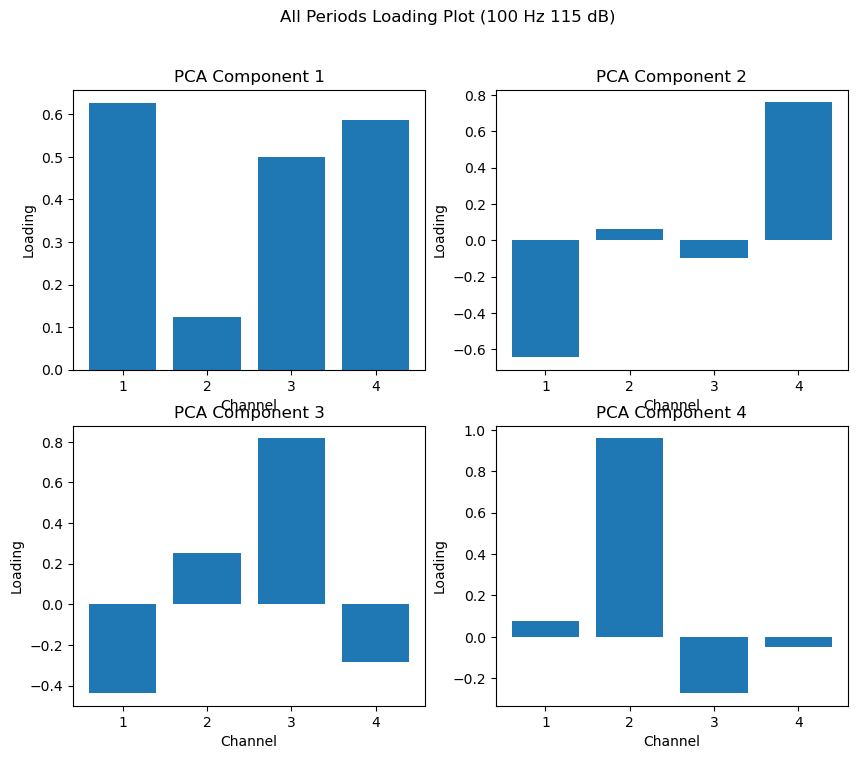

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.ravel()  # Flatten the 2x2 array of axes for easy indexing

for i, comp in enumerate(pca.components_):
    axs[i].bar(range(1, 5), comp)
    axs[i].set_title(f"PCA Component {i+1}")
    axs[i].set_xlabel("Channel")
    axs[i].set_ylabel("Loading")

fig.suptitle(f'All Periods Loading Plot ({myfreq} Hz {myamp} dB)')
plt.savefig(f'{subjid}_{myfreq}Hz_{myamp}dB_chart12.png', dpi=300, bbox_inches='tight')
plt.show()

### ICA

#### Apply Butterworth filter

In [31]:
def bandpass(data, low, high, fs, order=4):
    ny = 0.5 * fs
    b, a = butter(order, [low/ny, high/ny], btype='band')
    return filtfilt(b, a, data, axis=0)

# low, high = (myfreq*2-myfreq), (myfreq+myfreq*2)
low, high = 150, 250
# X_all_periods: shape (n_samples, n_channels)
X_filtered = bandpass(X_all_periods, low, high, fs)

#### Apply ICA

In [32]:
# Preprocessing: Standardize the data
scaler = StandardScaler()

# non_filtered version
# X_all_scaled = scaler.fit_transform(X_all_periods)

# filtered version
X_all_scaled = scaler.fit_transform(X_filtered)

# Improved FastICA configuration
ica = FastICA(
    n_components=len(channel_keys), 
    random_state=42,  # More robust random seed
    max_iter=500,     # Increased iterations
    tol=1e-4,         # Tightened tolerance
    whiten='unit-variance'  # Corrected whiten parameter
)

# Fit and transform
S = ica.fit_transform(X_all_scaled)
A = ica.mixing_

# Convergence check
print(f"ICA Convergence: {ica.n_iter_}")

ICA Convergence: 500


c:\Users\seaudlab\AppData\Local\anaconda3\envs\hydroc\Lib\site-packages\sklearn\decomposition\_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


### Plot IC Waveforms

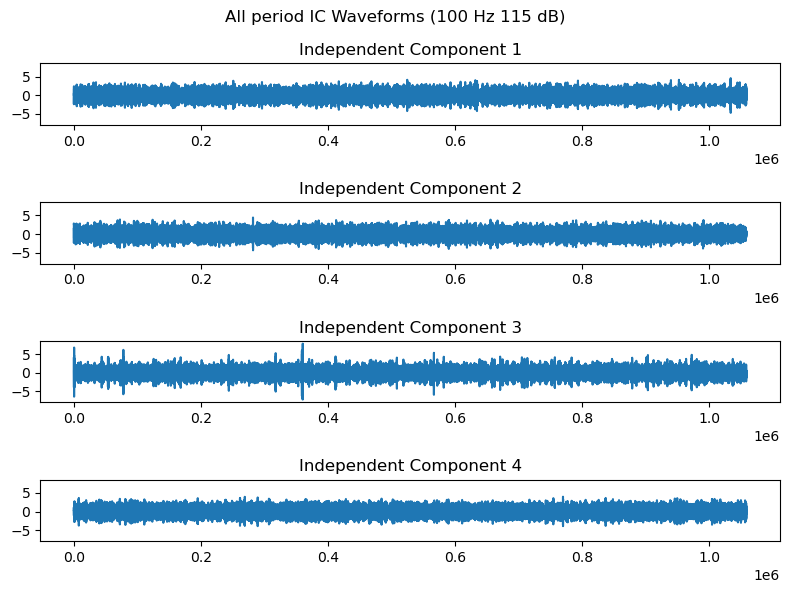

In [33]:
fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharey=True)

for i, ax in enumerate(axes):
    ax.plot(S[:, i])
    ax.set_title(f'Independent Component {i+1}')

fig.suptitle(f'All period IC Waveforms ({myfreq} Hz {myamp} dB)')
plt.tight_layout()
plt.savefig(f'{subjid}_{myfreq}Hz_{myamp}dB_chart13.png', dpi=300, bbox_inches='tight')
plt.show()


### Plot Mixing results

In [34]:
# Mixing matrix table
mix_df = pd.DataFrame(ica.mixing_, index=[f'ch{i+1}' for i in range(4)],
                      columns=[f'IC{i+1}' for i in range(4)])

# Reshape the mixing matrix DataFrame to long format
mix_df_long = mix_df.reset_index().melt(
    id_vars='index', 
    var_name='IC', 
    value_name='Mixing Value'
)
mix_df_long = mix_df_long.rename(columns={'index': 'Channel'})

# Create Altair chart
chart = alt.Chart(mix_df_long).mark_line(point=True).encode(
    x=alt.X('Channel:N', title='Channel Number'),
    y=alt.Y('Mixing Value:Q', title='IC Mixing Value'),
    color=alt.Color('IC:N', title='IC Number'),
    tooltip=['Channel', 'IC', 'Mixing Value']
).properties(
    title='IC Mixing Prestim',
    width=600,
    height=400
)

chart

alt.Chart(...)

### Calculate FFT of each IC

In [35]:
# Calculate FFT and power spectrum for each component
n_samples = len(S)
sampling_rate = 22050

# Get positive frequencies only
freqs = np.fft.rfftfreq(n_samples, d=1/sampling_rate)

# Calculate power spectrum for each component
power_spectra = []
for i in range(S.shape[1]):  # iterate through each component
    fft_vals = np.fft.rfft(S[:, i])
    power = np.abs(fft_vals) ** 2
    power_spectra.append(power)

# Convert to array for easier handling
power_spectra = np.array(power_spectra)  # shape: (4, n_freqs)


### Plot FFT results

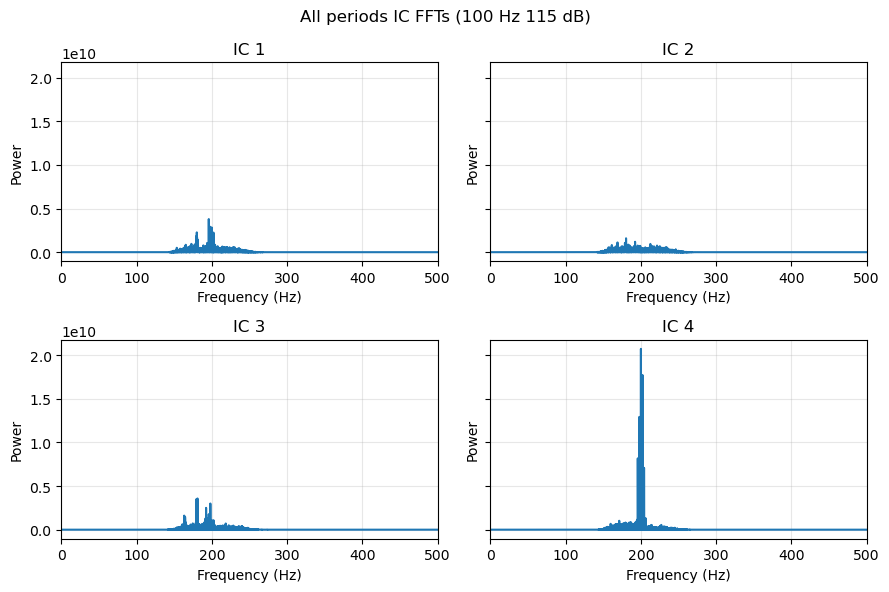

In [36]:
# Create subplots - 2x2 grid for 4 components
fig, axes = plt.subplots(2, 2, figsize=(9, 6),sharey=True)
axes = axes.flatten()

for i in range(power_spectra.shape[0]):
    axes[i].plot(freqs, power_spectra[i])
    axes[i].set_xlabel('Frequency (Hz)')
    axes[i].set_ylabel('Power')
    axes[i].set_title(f'IC {i+1}')
    axes[i].set_xlim(0, 500)
    axes[i].grid(True, alpha=0.3)

fig.suptitle(f'All periods IC FFTs ({myfreq} Hz {myamp} dB)')
plt.tight_layout()
plt.savefig(f'{subjid}_{myfreq}Hz_{myamp}dB_chart14.png', dpi=300, bbox_inches='tight')
plt.show()

### Save variables (this should be changed...)

In [37]:
S_all = S
A_all = A
S_all

array([[ 1.58799545e-01,  2.80486229e+00,  2.78374056e-01,
         1.80910822e-01],
       [ 2.59128924e-01,  2.82852042e+00,  1.17747717e-01,
         1.27219577e-01],
       [ 3.59710269e-01,  2.84293893e+00, -4.54672759e-02,
         7.26579585e-02],
       ...,
       [ 5.31949759e-03, -2.90740206e-03,  6.72738122e-03,
         2.86989117e-03],
       [ 4.56369540e-03, -2.45554815e-03,  5.88868420e-03,
         2.54530639e-03],
       [ 3.88565463e-03, -2.05827540e-03,  5.11693171e-03,
         2.23937703e-03]], shape=(1058400, 4))

### Remove ICs to denoise

In [38]:
# Select which ICs to remove (Depends on which)

S_modified = S_all.copy()
S_modified[:, 0] = 0  # Remove IC 1
# S_modified[:, 1] = 0  # Remove IC 2
S_modified[:, 2] = 0  # Remove IC 3
S_modified[:, 3] = 0  # Remove IC 4

# Reconstruct the signals
X_reconstructed = S_modified @ A.T

# Extract each channel and reshape to original dimensions
n_trials = current_cond['ch1'].shape[0]
n_samples_per_trial = current_cond['ch1'].shape[1]

ch1_denoised = X_reconstructed[:, 0].reshape(n_trials, n_samples_per_trial)
ch2_denoised = X_reconstructed[:, 1].reshape(n_trials, n_samples_per_trial)
ch3_denoised = X_reconstructed[:, 2].reshape(n_trials, n_samples_per_trial)
ch4_denoised = X_reconstructed[:, 3].reshape(n_trials, n_samples_per_trial)

# Create denoised dataset with same structure
denoised_data = {
    'filename': current_cond['filename'],
    'decision': current_cond['decision'],
    'period_len': current_cond['period_len'],
    'ch1': ch1_denoised,
    'ch2': ch2_denoised,
    'ch3': ch3_denoised,
    'ch4': ch4_denoised
}

### Create dicts to compare original, cleaned, and IC component data

In [39]:
ICA_dict={}
for channel in channel_keys:
    cur_clean = denoised_data[channel]
    
    clean_mean = np.mean(cur_clean,axis=0)
    clean_std = np.std(cur_clean,axis=0)

    ICA_dict[f"{channel}_mean"] =  clean_mean
    ICA_dict[f"{channel}_std"] = clean_std

orig_dict={}
for channel in channel_keys:
    orig = current_cond[channel]
    orig_mean = np.mean(orig,axis=0)
    orig_std = np.std(orig,axis=0)
    orig_dict[f"{channel}_mean"] =  orig_mean
    orig_dict[f"{channel}_std"] = orig_std
orig_dict

load_dict={}
for ii, channel in enumerate(channel_keys):
# separate by trial again
    clean_channel = S_all[:, ii].reshape(n_trials, n_samples_per_trial)
    load_mean = np.mean(clean_channel,axis=0)
    load_std = np.std(clean_channel,axis=0)
    load_dict[f"{channel}_mean"] =  load_mean
    load_dict[f"{channel}_std"] = load_std


### Plot comparison waveforms

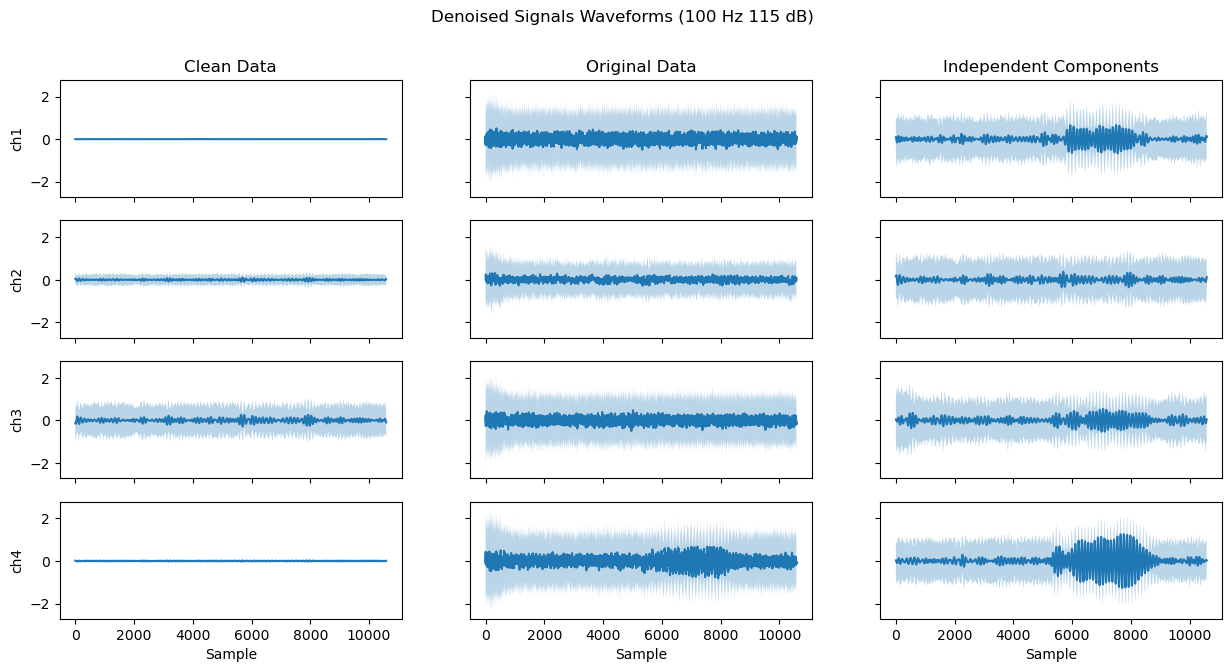

In [40]:
fig, axes = plt.subplots(4, 3, figsize=(15, 7), sharex=True, sharey=True)
channels = ['ch1', 'ch2', 'ch3', 'ch4']
x = np.arange(len(ICA_dict['ch1_mean']))

for row, channel in enumerate(channels):
    # Extract data for this channel
    mean_data_clean = ICA_dict[f'{channel}_mean']
    std_data_clean = ICA_dict[f'{channel}_std']
    
    mean_data_orig = orig_dict[f'{channel}_mean']
    std_data_orig = orig_dict[f'{channel}_std']
    
    mean_data_load = load_dict[f'{channel}_mean']
    std_data_load = load_dict[f'{channel}_std']
    
    # Plot clean data (left column)
    axes[row, 0].plot(x, mean_data_clean)
    axes[row, 0].fill_between(x, 
                               mean_data_clean - std_data_clean, 
                               mean_data_clean + std_data_clean, 
                               alpha=0.3)
    axes[row, 0].set_ylabel(f'{channel}')
    
    
    # Plot original data (right column)
    axes[row, 1].plot(x, mean_data_orig,)
    axes[row, 1].fill_between(x, 
                               mean_data_orig - std_data_orig, 
                               mean_data_orig + std_data_orig, 
                               alpha=0.3)
    
    
    # Plot original data (right column)
    axes[row, 2].plot(x, mean_data_load)
    axes[row, 2].fill_between(x, 
                            mean_data_load - std_data_load, 
                            mean_data_load + std_data_load, 
                            alpha=0.3)
    

# Add column titles
axes[0, 0].set_title('Clean Data')
axes[0, 1].set_title('Original Data')
axes[0, 2].set_title('Independent Components')

# Add x-label to bottom row
axes[3, 0].set_xlabel('Sample')
axes[3, 1].set_xlabel('Sample')
axes[3, 2].set_xlabel('Sample')

fig.suptitle(f'Denoised Signals Waveforms ({myfreq} Hz {myamp} dB)')
plt.savefig(f'{subjid}_{myfreq}Hz_{myamp}dB_chart9.png', dpi=300, bbox_inches='tight')
plt.show()

### Calculate Comparison FFTs

In [41]:
# Calculate FFT and power spectrum for each component
n_samples = len(ICA_dict['ch1_mean'])
# Get positive frequencies only
freqs = np.fft.rfftfreq(n_samples, d=1/sampling_rate)
# Calculate power spectrum for each component
# cleaned data
# mean
clean_spectra_mean = []
clean_spectra_std = []
for channel in channel_keys:  # iterate through each component
    fft_vals = np.fft.rfft(ICA_dict[f'{channel}_mean'])
    power = np.abs(fft_vals) ** 2
    clean_spectra_mean.append(power)
   
# std
for channel in channel_keys:  # iterate through each component
    fft_vals = np.fft.rfft(ICA_dict[f'{channel}_std'])
    power = np.abs(fft_vals) ** 2
    clean_spectra_std.append(power)
# original data
# mean
orig_spectra_mean = []
orig_spectra_std = []
for channel in channel_keys:  # iterate through each component
    fft_vals = np.fft.rfft(orig_dict[f'{channel}_mean'])
    power = np.abs(fft_vals) ** 2
    orig_spectra_mean.append(power)
   
# std
for channel in channel_keys:  # iterate through each component
    fft_vals = np.fft.rfft(orig_dict[f'{channel}_std'])
    power = np.abs(fft_vals) ** 2
    orig_spectra_std.append(power)
# loading data
# mean
load_spectra_mean = []
load_spectra_std = []
for channel in channel_keys:  # iterate through each component
    fft_vals = np.fft.rfft(load_dict[f'{channel}_mean'])
    power = np.abs(fft_vals) ** 2
    load_spectra_mean.append(power)
   
# std
for channel in channel_keys:  # iterate through each component
    fft_vals = np.fft.rfft(load_dict[f'{channel}_std'])
    power = np.abs(fft_vals) ** 2
    load_spectra_std.append(power)

# Convert to array for easier handling
# cleaned data
# mean
clean_spectra_mean = np.array(clean_spectra_mean)
clean_spectra_std = np.array(clean_spectra_std)
# original data
orig_spectra_mean = np.array(orig_spectra_mean)
orig_spectra_std = np.array(orig_spectra_std)
# loading data
load_spectra_mean = np.array(load_spectra_mean)
load_spectra_std = np.array(load_spectra_std)  # shape: (4, n_freqs)

### Plot comparison FFTs

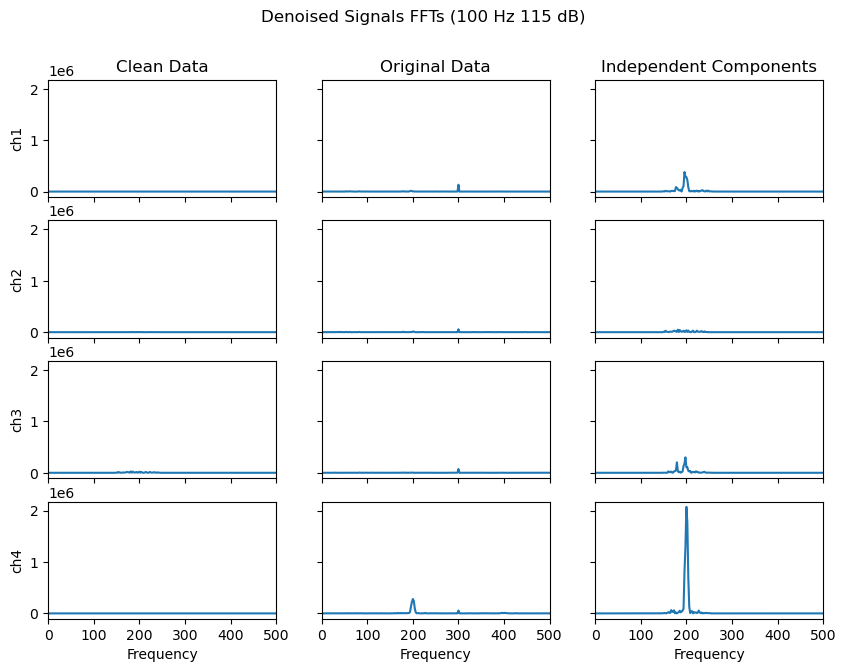

In [42]:
fig, axes = plt.subplots(4, 3, figsize=(10, 7), sharex=True, sharey=True)
channels = ['ch1', 'ch2', 'ch3', 'ch4']
x = np.arange(len(ICA_dict['ch1_mean']))

for row, channel in enumerate(channels):
    # Extract data for this channel
    mean_data_clean = clean_spectra_mean[row,:]
    std_data_clean = clean_spectra_std[row,:]
    
    mean_data_orig = orig_spectra_mean[row,:]
    std_data_orig = orig_spectra_std[row,:]
    
    mean_data_load = load_spectra_mean[row,:]
    std_data_load = load_spectra_std[row,:]
    
    # Plot clean data (left column)
    axes[row, 0].plot(freqs, mean_data_clean)
    axes[row, 0].set_ylabel(f'{channel}')

    # Plot original data (right column)
    axes[row, 1].plot(freqs, mean_data_orig,)

    # Plot original data (right column)
    axes[row, 2].plot(freqs, mean_data_load)
    
    
    # Add these lines inside your plotting loop
    axes[row, 0].set_xlim(0, 500)
    axes[row, 1].set_xlim(0, 500)
    axes[row, 2].set_xlim(0, 500)
    
    # # Add these lines inside your plotting loop
    # axes[row, 0].set_ylim(0, 100000)
    # axes[row, 1].set_ylim(0, 100000)

    




# Add column titles
axes[0, 0].set_title('Clean Data')
axes[0, 1].set_title('Original Data')
axes[0, 2].set_title('Independent Components')

# Add x-label to bottom row
axes[3, 0].set_xlabel('Frequency')
axes[3, 1].set_xlabel('Frequency')
axes[3, 2].set_xlabel('Frequency')


fig.suptitle(f'Denoised Signals FFTs ({myfreq} Hz {myamp} dB)')
plt.savefig(f'{subjid}_{myfreq}Hz_{myamp}dB_chart10.png', dpi=300, bbox_inches='tight')
plt.show()